In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
import re
sns.set()
!pip install scikit-learn

In [ ]:
dataset=pd.read_csv('train.csv')
pd.set_option('display.max_columns', None)


In [120]:
test_set=pd.read_csv('test.csv')
pd.set_option('display.max_columns', None)

In [ ]:
test_set.head()

,id,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,class
0,RB0IF4,2022-03-23,Indigo,6E,5376,00:10,Mumbai,08h 50m,1-stop,09:00,Delhi,economy
1,VZE001,2022-03-23,Indigo,6E,5376,00:10,Mumbai,07h 10m,1-stop,07:20,Delhi,economy
2,KBPR5E,2022-03-23,Indigo,6E,5376,00:10,Mumbai,10h 20m,1-stop,10:30,Delhi,economy
3,P9XC55,2022-03-23,AirAsia,I5,722,00:30,Bangalore,02h 50m,non-stop,03:20,Delhi,economy
4,SWZ04L,2022-03-23,AirAsia,I5,722,00:30,Bangalore,06h 05m,1-stop,06:35,Mumbai,economy


In [ ]:
dataset.head()

,id,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,class,price
0,UVYA93,2022-02-11,Indigo,6E,2106,03:00,Delhi,02h 10m,non-stop,05:10,Kolkata,economy,6270
1,1Y6UUB,2022-02-11,AirAsia,I5,764,04:25,Delhi,10h 20m,1-stop,14:45,Bangalore,economy,7423
2,J62B2K,2022-02-11,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,economy,5956
3,HW31QF,2022-02-11,AirAsia,I5,548,04:45,Delhi,02h 25m,non-stop,07:10,Kolkata,economy,6060
4,AI4BTM,2022-02-11,AirAsia,I5,548,04:45,Delhi,14h 20m,1-stop,19:05,Bangalore,economy,21343


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22942 entries, 0 to 22941
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          22942 non-null  object 
 1   date        22942 non-null  object 
 2   airline     22941 non-null  object 
 3   ch_code     22941 non-null  object 
 4   num_code    22941 non-null  float64
 5   dep_time    22941 non-null  object 
 6   from        22941 non-null  object 
 7   time_taken  22941 non-null  object 
 8   stop        22941 non-null  object 
 9   arr_time    22941 non-null  object 
 10  to          22941 non-null  object 
 11  class       22941 non-null  object 
 12  price       22941 non-null  float64
dtypes: float64(2), object(11)
memory usage: 2.3+ MB


In [ ]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56723 entries, 0 to 56722
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          56723 non-null  object
 1   date        56723 non-null  object
 2   airline     56723 non-null  object
 3   ch_code     56723 non-null  object
 4   num_code    56723 non-null  int64 
 5   dep_time    56723 non-null  object
 6   from        56723 non-null  object
 7   time_taken  56723 non-null  object
 8   stop        56723 non-null  object
 9   arr_time    56723 non-null  object
 10  to          56723 non-null  object
 11  class       56723 non-null  object
dtypes: int64(1), object(11)
memory usage: 5.2+ MB


In [ ]:
dataset.isnull().sum()

id            0
date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
class         0
price         0
dtype: int64

In [ ]:
test_set.isnull().sum()

id            0
date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
class         0
dtype: int64

In [ ]:
dataset.dropna(inplace=True)

In [ ]:
dataset.isnull().sum()

id            0
date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
class         0
price         0
dtype: int64

In [ ]:
###Feature Engineering

In [ ]:
dataset.head()


,id,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,class,price
0,UVYA93,2022-02-11,Indigo,6E,2106.0,03:00,Delhi,02h 10m,non-stop,05:10,Kolkata,economy,6270.0
1,1Y6UUB,2022-02-11,AirAsia,I5,764.0,04:25,Delhi,10h 20m,1-stop,14:45,Bangalore,economy,7423.0
2,J62B2K,2022-02-11,AirAsia,I5,764.0,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,economy,5956.0
3,HW31QF,2022-02-11,AirAsia,I5,548.0,04:45,Delhi,02h 25m,non-stop,07:10,Kolkata,economy,6060.0
4,AI4BTM,2022-02-11,AirAsia,I5,548.0,04:45,Delhi,14h 20m,1-stop,19:05,Bangalore,economy,21343.0


In [ ]:
###Handling Object Data


In [ ]:
#date of journey , dep_time , time_taken and arrival_time are object data types
##To derive numeric features on these, we will use pandas to_datetime method in order to convert
##object data type to datetime datatype

In [ ]:
#attribut.dt.day(this wil extract the day)
#attribute.dt.month(this will extract that data)

In [ ]:
#date is the day when the plane departs
dataset['Journey_day'] = pd.to_datetime(dataset['date'], format="%Y-%m-%d").dt.day
dataset['Journey_month'] = pd.to_datetime(dataset['date'], format="%Y-%m-%d").dt.month

In [121]:
#date is the day when the plane departs
test_set['Journey_day'] = pd.to_datetime(test_set['date'], format="%Y-%m-%d").dt.day
test_set['Journey_month'] = pd.to_datetime(test_set['date'], format="%Y-%m-%d").dt.month

In [ ]:
dataset.tail(20)

,id,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,class,price,Journey_day,Journey_month
22921,XJ1P9L,2022-02-16,Vistara,UK,859.0,10:25,Delhi,12h 35m,1-stop,23:00,Mumbai,business,41281.0,16,2
22922,2XB5GW,2022-02-16,Vistara,UK,859.0,10:25,Delhi,23h 35m,1-stop,10:00,Mumbai,business,41281.0,16,2
22923,YAGD6S,2022-02-16,Vistara,UK,772.0,10:25,Kolkata,09h 30m,1-stop,19:55,Chennai,business,55502.0,16,2
22924,N6HOMT,2022-02-16,Vistara,UK,772.0,10:25,Kolkata,12h 40m,1-stop,23:05,Chennai,business,55502.0,16,2
22925,22MD7Q,2022-02-16,Air India,AI,402.0,10:25,Kolkata,26h 15m,1-stop,12:40,Chennai,business,55983.0,16,2
22926,S8WAYC,2022-02-16,Air India,AI,402.0,10:25,Kolkata,22h 30m,1-stop,08:55,Chennai,business,55983.0,16,2
22927,5XGMSD,2022-02-16,Vistara,UK,772.0,10:25,Kolkata,22h 25m,1-stop,08:50,Chennai,business,55502.0,16,2
22928,BVZWP4,2022-02-16,Vistara,UK,772.0,10:25,Kolkata,25h 25m,1-stop,11:50,Chennai,business,55502.0,16,2
22929,SEY01L,2022-02-16,Air India,AI,402.0,10:25,Kolkata,08h 35m,1-stop,19:00,Chennai,business,55983.0,16,2
22930,1985J6,2022-02-16,Air India,AI,402.0,10:25,Kolkata,13h 10m,1-stop,23:35,Chennai,business,55983.0,16,2


In [ ]:
##since we have converted the date column in to day and month we can t
#then drop the date column
dataset.drop(['date'],axis=1,inplace=True)

In [122]:
##since we have converted the date column in to day and month we can t
#then drop the date column
test_set.drop(['date'],axis=1,inplace=True)

In [ ]:
#Departure time is the time when the plane leaves the gate of the origin
#similar to the data of the journey we can extract hours from the departure time
#Extracting Hours
dataset['dep_hour']=pd.to_datetime(dataset["dep_time"]).dt.hour
#Extracting minutes
dataset['dep_min']=pd.to_datetime(dataset["dep_time"]).dt.minute


In [123]:
#Departure time is the time when the plane leaves the gate of the origin
#similar to the data of the journey we can extract hours from the departure time
#Extracting Hours
test_set['dep_hour']=pd.to_datetime(test_set["dep_time"]).dt.hour
#Extracting minutes
test_set['dep_min']=pd.to_datetime(test_set["dep_time"]).dt.minute


In [ ]:
##Now we will delete the dep_time since we have extracted the hours and minutes from it
dataset.drop(["dep_time"],axis=1,inplace=True)

In [ ]:
##Now we will delete the dep_time since we have extracted the hours and minutes from it
test_set.drop(["dep_time"],axis=1,inplace=True)

In [ ]:
dataset.head()

,id,airline,ch_code,num_code,from,time_taken,stop,arr_time,to,class,price,Journey_day,Journey_month,dep_hour,dep_min
0,UVYA93,Indigo,6E,2106.0,Delhi,02h 10m,non-stop,05:10,Kolkata,economy,6270.0,11,2,3,0
1,1Y6UUB,AirAsia,I5,764.0,Delhi,10h 20m,1-stop,14:45,Bangalore,economy,7423.0,11,2,4,25
2,J62B2K,AirAsia,I5,764.0,Delhi,02h 10m,non-stop,06:35,Mumbai,economy,5956.0,11,2,4,25
3,HW31QF,AirAsia,I5,548.0,Delhi,02h 25m,non-stop,07:10,Kolkata,economy,6060.0,11,2,4,45
4,AI4BTM,AirAsia,I5,548.0,Delhi,14h 20m,1-stop,19:05,Bangalore,economy,21343.0,11,2,4,45


In [ ]:
##Arrival time is when a plane pulls up or reaches to the gate
#similar to to the data of the journey we can extract values from the arrival time

#Extracting hours
dataset["arr_hr"]=pd.to_datetime(dataset["arr_time"]).dt.hour
#Extracting minutes
dataset["arr_min"]=pd.to_datetime(dataset["arr_time"]).dt.minute



In [124]:
##Arrival time is when a plane pulls up or reaches to the gate
#similar to to the data of the journey we can extract values from the arrival time

#Extracting hours
test_set["arr_hr"]=pd.to_datetime(test_set["arr_time"]).dt.hour
#Extracting minutes
test_set["arr_min"]=pd.to_datetime(test_set["arr_time"]).dt.minute


In [ ]:
#Now we can drop the arrival time column since we have extracted the arrival hours and the arrival minutes
dataset.head()

,id,airline,ch_code,num_code,from,time_taken,stop,arr_time,to,class,price,Journey_day,Journey_month,dep_hour,dep_min,arr_hr,arr_min
0,UVYA93,Indigo,6E,2106.0,Delhi,02h 10m,non-stop,05:10,Kolkata,economy,6270.0,11,2,3,0,5,10
1,1Y6UUB,AirAsia,I5,764.0,Delhi,10h 20m,1-stop,14:45,Bangalore,economy,7423.0,11,2,4,25,14,45
2,J62B2K,AirAsia,I5,764.0,Delhi,02h 10m,non-stop,06:35,Mumbai,economy,5956.0,11,2,4,25,6,35
3,HW31QF,AirAsia,I5,548.0,Delhi,02h 25m,non-stop,07:10,Kolkata,economy,6060.0,11,2,4,45,7,10
4,AI4BTM,AirAsia,I5,548.0,Delhi,14h 20m,1-stop,19:05,Bangalore,economy,21343.0,11,2,4,45,19,5


In [ ]:
# Extract hours and minutes from the 'Duration' column
time_hours = []
time_mins = []

for time_taken in dataset['time_taken']:
    hours, minutes = map(int, re.findall(r'\d+', time_taken))  # Extract hours and minutes using regular expression
    time_hours.append(hours)
    time_mins.append(minutes)

# Add duration_hours and duration_mins as new columns
dataset['time_taken_hrs'] = time_hours
dataset['time_taken_mins'] = time_mins

In [125]:
# Extract hours and minutes from the 'Duration' column
time_hours = []
time_mins = []

for time_taken in test_set['time_taken']:
    hours, minutes = map(int, re.findall(r'\d+', time_taken))  # Extract hours and minutes using regular expression
    time_hours.append(hours)
    time_mins.append(minutes)

# Add duration_hours and duration_mins as new columns
test_set['time_taken_hrs'] = time_hours
test_set['time_taken_mins'] = time_mins

In [ ]:

dataset.drop(['time_mins'],axis=1,inplace=True)

KeyError: ignored

In [126]:

test_set.drop(['time_mins'],axis=1,inplace=True)

KeyError: ignored

In [ ]:
dataset.head()

,id,airline,ch_code,num_code,from,time_taken,stop,arr_time,to,class,price,Journey_day,Journey_month,dep_hour,dep_min,arr_hr,arr_min,time_taken_hrs,time_taken_mins
0,UVYA93,Indigo,6E,2106.0,Delhi,02h 10m,non-stop,05:10,Kolkata,economy,6270.0,11,2,3,0,5,10,2,10
1,1Y6UUB,AirAsia,I5,764.0,Delhi,10h 20m,1-stop,14:45,Bangalore,economy,7423.0,11,2,4,25,14,45,10,20
2,J62B2K,AirAsia,I5,764.0,Delhi,02h 10m,non-stop,06:35,Mumbai,economy,5956.0,11,2,4,25,6,35,2,10
3,HW31QF,AirAsia,I5,548.0,Delhi,02h 25m,non-stop,07:10,Kolkata,economy,6060.0,11,2,4,45,7,10,2,25
4,AI4BTM,AirAsia,I5,548.0,Delhi,14h 20m,1-stop,19:05,Bangalore,economy,21343.0,11,2,4,45,19,5,14,20


In [ ]:
#Now we can drop the time taken column since we have extracted the hour and minutes of the columns
dataset.drop(['time_taken'],axis=1,inplace=True)

In [ ]:
dataset.drop(['arr_time'],axis=1,inplace=True)
dataset.head()

,id,airline,ch_code,num_code,from,stop,to,class,price,Journey_day,Journey_month,dep_hour,dep_min,arr_hr,arr_min,time_taken_hrs,time_taken_mins
0,UVYA93,Indigo,6E,2106,Delhi,non-stop,Kolkata,economy,6270,11,2,3,0,5,10,2,10
1,1Y6UUB,AirAsia,I5,764,Delhi,1-stop,Bangalore,economy,7423,11,2,4,25,14,45,10,20
2,J62B2K,AirAsia,I5,764,Delhi,non-stop,Mumbai,economy,5956,11,2,4,25,6,35,2,10
3,HW31QF,AirAsia,I5,548,Delhi,non-stop,Kolkata,economy,6060,11,2,4,45,7,10,2,25
4,AI4BTM,AirAsia,I5,548,Delhi,1-stop,Bangalore,economy,21343,11,2,4,45,19,5,14,20


In [127]:
#Now we can drop the time taken column since we have extracted the hour and minutes of the columns
test_set.drop(['time_taken'],axis=1,inplace=True)
test_set.drop(['arr_time'],axis=1,inplace=True)
test_set.head()

,id,airline,ch_code,num_code,dep_time,from,stop,to,class,Journey_day,Journey_month,dep_hour,dep_min,arr_hr,arr_min,time_taken_hrs,time_taken_mins
0,RB0IF4,Indigo,6E,5376,00:10,Mumbai,1-stop,Delhi,economy,23,3,0,10,9,0,8,50
1,VZE001,Indigo,6E,5376,00:10,Mumbai,1-stop,Delhi,economy,23,3,0,10,7,20,7,10
2,KBPR5E,Indigo,6E,5376,00:10,Mumbai,1-stop,Delhi,economy,23,3,0,10,10,30,10,20
3,P9XC55,AirAsia,I5,722,00:30,Bangalore,non-stop,Delhi,economy,23,3,0,30,3,20,2,50
4,SWZ04L,AirAsia,I5,722,00:30,Bangalore,1-stop,Mumbai,economy,23,3,0,30,6,35,6,5


In [ ]:
##Handling categorical data
#airline ,from ,to,stop,class are all categorical variables


In [ ]:
#Featture engineering on airline
dataset['airline'].value_counts()

Vistara      103599
Air India     66205
Indigo        34550
GO FIRST      18791
AirAsia       12714
SpiceJet       7595
StarAir          48
Trujet           36
Name: airline, dtype: int64

In [ ]:
#Featture engineering on airline
test_set['airline'].value_counts()

Vistara      24260
Air India    14689
Indigo        8570
GO FIRST      4386
AirAsia       3384
SpiceJet      1416
StarAir         13
Trujet           5
Name: airline, dtype: int64

In [ ]:
#As we can see from the above airline is Nominal categorical thus we will perform OneHotEncoding
airline=dataset[['airline']]
Current_airline_list=airline['airline']
New_airline_list=[]

for carrier in Current_airline_list:
  if carrier in['Vistara','Air India','Indigo','GO FIRST','AirAsia','SpiceJet','StarAir' ,'Trujet']:
    New_airline_list.append(carrier)
  else:
    New_airline_list.append('other')

airline['airline']=pd.DataFrame(New_airline_list)
airline['airline'].value_counts()



<ipython-input-49-92fbdf34c546>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airline['airline']=pd.DataFrame(New_airline_list)


Vistara      103599
Air India     66205
Indigo        34550
GO FIRST      18791
AirAsia       12714
SpiceJet       7595
StarAir          48
Trujet           36
Name: airline, dtype: int64

In [ ]:
#As we can see from the above airline is Nominal categorical thus we will perform OneHotEncoding
airline=test_set[['airline']]
Current_airline_list=airline['airline']
New_airline_list=[]

for carrier in Current_airline_list:
  if carrier in['Vistara','Air India','Indigo','GO FIRST','AirAsia','SpiceJet','StarAir' ,'Trujet']:
    New_airline_list.append(carrier)
  else:
    New_airline_list.append('other')

airline['airline']=pd.DataFrame(New_airline_list)
airline['airline'].value_counts()



<ipython-input-120-b80d9e00210d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airline['airline']=pd.DataFrame(New_airline_list)


Vistara      24260
Air India    14689
Indigo        8570
GO FIRST      4386
AirAsia       3384
SpiceJet      1416
StarAir         13
Trujet           5
Name: airline, dtype: int64

In [ ]:
airline=pd.get_dummies(airline,drop_first=True)
airline.head()

,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,airline_StarAir,airline_Trujet,airline_Vistara
0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [ ]:
airline=pd.get_dummies(airline,drop_first=True)
airline.head()

,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,airline_StarAir,airline_Trujet,airline_Vistara
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [ ]:
#Feature enginnering on From

In [ ]:
dataset['from'].value_counts()

Delhi        49715
Mumbai       49604
Bangalore    42228
Kolkata      37635
Hyderabad    32982
Chennai      31374
Name: from, dtype: int64

In [ ]:
#As from is Nominal is Categotical data we will perform OneHotEncoding
fromm =dataset[['from']]
fromm =pd.get_dummies(fromm,drop_first=True)
fromm.head()


,from_Chennai,from_Delhi,from_Hyderabad,from_Kolkata,from_Mumbai
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0


In [ ]:
#As from is Nominal is Categotical data we will perform OneHotEncoding
fromm =test_set[['from']]
fromm =pd.get_dummies(fromm,drop_first=True)
fromm.head()


,from_Chennai,from_Delhi,from_Hyderabad,from_Kolkata,from_Mumbai
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,0
4,0,0,0,0,0


In [ ]:
#Feature engineering on : to

In [ ]:
dataset['to'].value_counts()

Mumbai       48179
Delhi        46356
Bangalore    41354
Kolkata      40153
Hyderabad    34622
Chennai      32874
Name: to, dtype: int64

In [ ]:
#As from is Nominal is Categotical data we will perform OneHotEncoding
to =dataset[['to']]
to =pd.get_dummies(to,drop_first = True)
to.head()

,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai
0,0,0,0,1,0
1,0,0,0,0,0
2,0,0,0,0,1
3,0,0,0,1,0
4,0,0,0,0,0


In [ ]:
#As from is Nominal is Categotical data we will perform OneHotEncoding
to =test_set[['to']]
to =pd.get_dummies(to,drop_first = True)
to.head()

,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,0,0,0,1


In [ ]:
dataset.head()
#Feature engineering on class

,id,airline,ch_code,num_code,from,stop,to,class,price,Journey_day,Journey_month,dep_hour,dep_min,arr_hr,arr_min,time_taken_hrs,time_taken_mins
0,UVYA93,Indigo,6E,2106.0,Delhi,non-stop,Kolkata,economy,6270.0,11,2,3,0,5,10,2,10
1,1Y6UUB,AirAsia,I5,764.0,Delhi,1-stop,Bangalore,economy,7423.0,11,2,4,25,14,45,10,20
2,J62B2K,AirAsia,I5,764.0,Delhi,non-stop,Mumbai,economy,5956.0,11,2,4,25,6,35,2,10
3,HW31QF,AirAsia,I5,548.0,Delhi,non-stop,Kolkata,economy,6060.0,11,2,4,45,7,10,2,25
4,AI4BTM,AirAsia,I5,548.0,Delhi,1-stop,Bangalore,economy,21343.0,11,2,4,45,19,5,14,20


In [ ]:
dataset['class'].value_counts()

economy     167412
business     76126
Name: class, dtype: int64

In [ ]:
#Since class is Nominal categorical variable we will perfom one hot encoding


In [ ]:
classs =dataset[['class']]
classs =pd.get_dummies(classs,drop_first = True)
classs.tail(20)

,class_economy
243518,1
243519,1
243520,1
243521,1
243522,1
243523,1
243524,1
243525,1
243526,1
243527,1


In [ ]:
classs =test_set[['class']]
classs =pd.get_dummies(classs,drop_first = True)
classs.tail(20)

,class_economy
56703,1
56704,1
56705,1
56706,1
56707,1
56708,1
56709,1
56710,1
56711,1
56712,1


In [ ]:
dataset['num_code'].value_counts()

808.0     347
838.0     259
720.0     247
822.0     232
774.0     219
         ... 
5014.0      1
6613.0      1
8339.0      1
5093.0      1
1032.0      1
Name: num_code, Length: 882, dtype: int64

In [ ]:
#Feature engineering on ch_Code

In [ ]:
dataset['ch_code'].value_counts()

UK    103599
AI     66205
6E     34550
G8     18791
I5     12714
SG      7595
S5        48
2T        36
Name: ch_code, dtype: int64

In [ ]:
#Since ch_code is Nominal categorical variable we will perform OneHotEncoding

In [ ]:
ch_code=dataset[['ch_code']]
ch_code =pd.get_dummies(ch_code,drop_first = True)
ch_code.head()



,ch_code_6E,ch_code_AI,ch_code_G8,ch_code_I5,ch_code_S5,ch_code_SG,ch_code_UK
0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0


In [ ]:
ch_code=test_set[['ch_code']]
ch_code =pd.get_dummies(ch_code,drop_first = True)
ch_code.head()


,ch_code_6E,ch_code_AI,ch_code_G8,ch_code_I5,ch_code_S5,ch_code_SG,ch_code_UK
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0


In [ ]:
#Feature engineering on stop


In [ ]:
dataset['stop'].value_counts()

1-stop                        197421
non-stop                       29132
2+-stop                        10974
1-stop: Via IXU                 1492
1-stop: Via IDR                 1169
1-stop: Via Patna                541
1-stop: Via PAT                  306
1-stop: Via Indore               290
1-stop: Via MYQ                  264
1-stop: Via KLH                  260
1-stop: Via Bhubaneswar          244
1-stop: Via JGB                  158
1-stop: Via JRG                  148
1-stop: Via Hyderabad            133
1-stop: Via BBI                  124
1-stop: Via Delhi                119
1-stop: Via STV                  114
1-stop: Via IXE                  108
1-stop: Via Ranchi                93
1-stop: Via Raipur                85
1-stop: Via Chennai               71
1-stop: Via Guwahati              45
1-stop: Via Mysore                37
1-stop: Via Mangalore             35
1-stop: Via VTZ                   25
1-stop: Via Nagpur                24
1-stop: Via Mumbai                23
1

In [ ]:
#As stop is Ordinal categorical type we will perform LabelEncoder
#Here the values are assinged with the corresponding keys


In [ ]:

dataset.replace({"non-stop": 0, "1-stop": 1, "2+-stop": 2}, inplace = True)
dataset.head()



,id,airline,ch_code,num_code,from,stop,to,class,price,Journey_day,Journey_month,dep_hour,dep_min,arr_hr,arr_min,time_taken_hrs,time_taken_mins
0,UVYA93,Indigo,6E,2106,Delhi,0,Kolkata,economy,6270,11,2,3,0,5,10,2,10
1,1Y6UUB,AirAsia,I5,764,Delhi,1,Bangalore,economy,7423,11,2,4,25,14,45,10,20
2,J62B2K,AirAsia,I5,764,Delhi,0,Mumbai,economy,5956,11,2,4,25,6,35,2,10
3,HW31QF,AirAsia,I5,548,Delhi,0,Kolkata,economy,6060,11,2,4,45,7,10,2,25
4,AI4BTM,AirAsia,I5,548,Delhi,1,Bangalore,economy,21343,11,2,4,45,19,5,14,20


In [ ]:

test_set.replace({"non-stop": 0, "1-stop": 1, "2+-stop": 2}, inplace = True)
test_set.head()

,id,date,airline,ch_code,num_code,from,stop,to,class,dep_hour,dep_min,arr_hr,arr_min,time_taken_hrs,time_taken_mins
0,RB0IF4,2022-03-23,Indigo,6E,5376,Mumbai,1,Delhi,economy,0,10,9,0,8,50
1,VZE001,2022-03-23,Indigo,6E,5376,Mumbai,1,Delhi,economy,0,10,7,20,7,10
2,KBPR5E,2022-03-23,Indigo,6E,5376,Mumbai,1,Delhi,economy,0,10,10,30,10,20
3,P9XC55,2022-03-23,AirAsia,I5,722,Bangalore,0,Delhi,economy,0,30,3,20,2,50
4,SWZ04L,2022-03-23,AirAsia,I5,722,Bangalore,1,Mumbai,economy,0,30,6,35,6,5


In [ ]:
#Now we will concatenate the dataframe-->train_data +airline+from+to+class+ch_code
data_train1 = pd.concat([dataset, airline, classs, fromm, to,ch_code], axis=1)

# Drop specific columns
data_train1.drop(['airline', 'class', 'to', 'from', 'ch_code'] ,axis=1, inplace=True)  # Replace 0, 1, 2, 3, 4 with the appropriate column indices

data_train1.head()

,id,num_code,stop,price,Journey_day,Journey_month,dep_hour,dep_min,arr_hr,arr_min,time_taken_hrs,time_taken_mins,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,airline_StarAir,airline_Trujet,airline_Vistara,class_economy,from_Chennai,from_Delhi,from_Hyderabad,from_Kolkata,from_Mumbai,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai,ch_code_6E,ch_code_AI,ch_code_G8,ch_code_I5,ch_code_S5,ch_code_SG,ch_code_UK
0,UVYA93,2106,0,6270,11,2,3,0,5,10,2,10,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
1,1Y6UUB,764,1,7423,11,2,4,25,14,45,10,20,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,J62B2K,764,0,5956,11,2,4,25,6,35,2,10,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,HW31QF,548,0,6060,11,2,4,45,7,10,2,25,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,AI4BTM,548,1,21343,11,2,4,45,19,5,14,20,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
#Now we will concatenate the dataframe-->train_data +airline+from+to+class+ch_code
test_set1 = pd.concat([test_set, airline, classs, fromm, to,ch_code], axis=1)

# Drop specific columns
test_set1.drop(['airline', 'class', 'to', 'from', 'ch_code'] ,axis=1, inplace=True)  # Replace 0, 1, 2, 3, 4 with the appropriate column indices

test_set1.head()

,id,num_code,stop,dep_hour,dep_min,arr_hr,arr_min,time_taken_hrs,time_taken_mins,Journey_day,Journey_month,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,airline_StarAir,airline_Trujet,airline_Vistara,class_economy,from_Chennai,from_Delhi,from_Hyderabad,from_Kolkata,from_Mumbai,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai,ch_code_6E,ch_code_AI,ch_code_G8,ch_code_I5,ch_code_S5,ch_code_SG,ch_code_UK
0,RB0IF4,5376,1,0,10,9,0,8,50,23,3,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0
1,VZE001,5376,1,0,10,7,20,7,10,23,3,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0
2,KBPR5E,5376,1,0,10,10,30,10,20,23,3,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0
3,P9XC55,722,0,0,30,3,20,2,50,23,3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,SWZ04L,722,1,0,30,6,35,6,5,23,3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [ ]:
test_set1.columns

Index(['id', 'num_code', 'stop', 'dep_hour', 'dep_min', 'arr_hr', 'arr_min',
       'time_taken_hrs', 'time_taken_mins', 'Journey_day', 'Journey_month',
       'class_economy', 'from_Chennai', 'from_Delhi', 'from_Hyderabad',
       'from_Kolkata', 'from_Mumbai', 'to_Chennai', 'to_Delhi', 'to_Hyderabad',
       'to_Kolkata', 'to_Mumbai', 'ch_code_6E', 'ch_code_AI', 'ch_code_G8',
       'ch_code_I5', 'ch_code_S5', 'ch_code_SG', 'ch_code_UK'],
      dtype='object')

In [ ]:
dataset.head()

,id,airline,ch_code,num_code,from,stop,to,class,price,Journey_day,Journey_month,dep_hour,dep_min,arr_hr,arr_min,time_taken_hrs,time_taken_mins
0,UVYA93,Indigo,6E,2106.0,Delhi,0,Kolkata,economy,6270.0,11,2,3,0,5,10,2,10
1,1Y6UUB,AirAsia,I5,764.0,Delhi,1,Bangalore,economy,7423.0,11,2,4,25,14,45,10,20
2,J62B2K,AirAsia,I5,764.0,Delhi,0,Mumbai,economy,5956.0,11,2,4,25,6,35,2,10
3,HW31QF,AirAsia,I5,548.0,Delhi,0,Kolkata,economy,6060.0,11,2,4,45,7,10,2,25
4,AI4BTM,AirAsia,I5,548.0,Delhi,1,Bangalore,economy,21343.0,11,2,4,45,19,5,14,20


In [ ]:

dataset.shape

(22941, 17)

In [ ]:
data_train1.shape

(22941, 37)

In [ ]:
#Feature Selection


In [ ]:
#Finding out the best feature which will contribute and have good relation with the target variable.
#Follwing are some of the feature selection methods

In [ ]:
#1. Feature Importance
#2. VIF

In [ ]:
data_train1.columns

Index(['id', 'num_code', 'stop', 'price', 'Journey_day', 'Journey_month',
       'dep_hour', 'dep_min', 'arr_hr', 'arr_min', 'time_taken_hrs',
       'time_taken_mins', 'airline_AirAsia', 'airline_GO FIRST',
       'airline_Indigo', 'airline_SpiceJet', 'airline_StarAir',
       'airline_Trujet', 'airline_Vistara', 'class_economy', 'from_Chennai',
       'from_Delhi', 'from_Hyderabad', 'from_Kolkata', 'from_Mumbai',
       'to_Chennai', 'to_Delhi', 'to_Hyderabad', 'to_Kolkata', 'to_Mumbai',
       'ch_code_6E', 'ch_code_AI', 'ch_code_G8', 'ch_code_I5', 'ch_code_S5',
       'ch_code_SG', 'ch_code_UK'],
      dtype='object')

In [ ]:
data_train1.head(10)

,id,num_code,stop,price,Journey_day,Journey_month,dep_hour,dep_min,arr_hr,arr_min,time_taken_hrs,time_taken_mins,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,airline_StarAir,airline_Trujet,airline_Vistara,class_economy,from_Chennai,from_Delhi,from_Hyderabad,from_Kolkata,from_Mumbai,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai,ch_code_6E,ch_code_AI,ch_code_G8,ch_code_I5,ch_code_S5,ch_code_SG,ch_code_UK
0,UVYA93,2106,0,6270,11,2,3,0,5,10,2,10,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
1,1Y6UUB,764,1,7423,11,2,4,25,14,45,10,20,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,J62B2K,764,0,5956,11,2,4,25,6,35,2,10,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,HW31QF,548,0,6060,11,2,4,45,7,10,2,25,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,AI4BTM,548,1,21343,11,2,4,45,19,5,14,20,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,6I80U0,548,1,21343,11,2,4,45,16,15,11,30,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6,5FL60M,548,1,7423,11,2,4,45,12,20,7,35,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7,HPR9SQ,2471,1,10523,11,2,4,50,15,40,10,50,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8,9CUQP4,453,2,13688,11,2,4,55,8,50,27,55,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
9,7TX5IR,453,1,11900,11,2,4,55,13,45,8,50,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [ ]:
test_set1.columns

Index(['id', 'num_code', 'stop', 'dep_hour', 'dep_min', 'arr_hr', 'arr_min',
       'time_taken_hrs', 'time_taken_mins', 'Journey_day', 'Journey_month',
       'class_economy', 'from_Chennai', 'from_Delhi', 'from_Hyderabad',
       'from_Kolkata', 'from_Mumbai', 'to_Chennai', 'to_Delhi', 'to_Hyderabad',
       'to_Kolkata', 'to_Mumbai', 'ch_code_6E', 'ch_code_AI', 'ch_code_G8',
       'ch_code_I5', 'ch_code_S5', 'ch_code_SG', 'ch_code_UK'],
      dtype='object')

In [ ]:
y=data_train1.iloc[:,3]

In [ ]:
print(y)

0          6270
1          7423
2          5956
3          6060
4         21343
          ...  
243533     3916
243534     1776
243535     2057
243536     2359
243537     2477
Name: price, Length: 243538, dtype: int64


In [ ]:
column_name = data_train1.columns[1]

# Print the column name
print("Column name:", column_name)

Column name: num_code


In [ ]:
print(X.shape,y.shape)


(22941, 20) (22941,)


In [ ]:
#Feature Importance
X=data_train1.loc[:,['num_code','Journey_day', 'Journey_month',
       'dep_hour', 'dep_min', 'arr_hr', 'arr_min', 'time_taken_hrs',
       'time_taken_mins', 'airline_AirAsia', 'airline_GO FIRST',
       'airline_Indigo', 'airline_SpiceJet', 'airline_StarAir',
       'airline_Trujet', 'airline_Vistara', 'class_economy', 'from_Chennai',
       'from_Delhi', 'from_Hyderabad', 'from_Kolkata', 'from_Mumbai',
       'to_Chennai', 'to_Delhi', 'to_Hyderabad', 'to_Kolkata', 'to_Mumbai',
       'ch_code_6E', 'ch_code_AI', 'ch_code_G8', 'ch_code_I5', 'ch_code_S5',
       'ch_code_SG', 'ch_code_UK'],]


In [ ]:
#Important feature using ExtraTressRegressor
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

print(selection.feature_importances_)

[9.36180491e-03 1.29435860e-02 7.63540535e-03 4.06617379e-03
 3.96944270e-03 5.22086355e-03 4.43635535e-03 3.74727138e-02
 2.63323263e-03 1.18652888e-04 4.41820671e-05 9.63024955e-05
 2.63779256e-05 7.47130903e-07 7.94463142e-07 3.84805449e-03
 8.75171889e-01 1.16086352e-03 5.03647988e-03 1.70994019e-03
 2.13462664e-03 2.23683591e-03 1.42462392e-03 3.97091979e-03
 2.12441451e-03 2.34552649e-03 2.72281631e-03 9.66760357e-05
 4.24586721e-03 3.92509267e-05 1.59498655e-04 7.74124848e-07
 3.17821791e-05 3.51252536e-03]


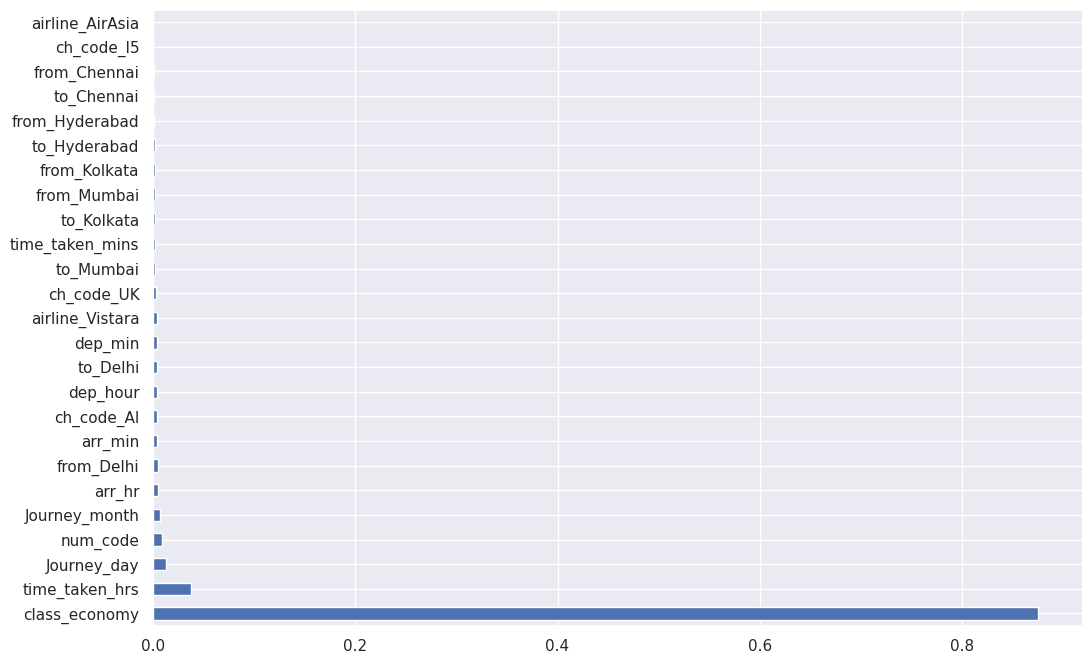

In [ ]:

#plot graph of feature importances for better visualization
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

In [ ]:
# Checking for Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(z):
    # Calculating Variable Inflation Factor (VIF)
    vif = pd.DataFrame()
    vif["variables"] = z.columns
    vif["VIF"] = [variance_inflation_factor(z.values, i) for i in range(z.shape[1])]
    return(vif)

In [ ]:
# Compute VIF on X
calc_vif(X)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,num_code,1.259469
1,Journey_day,1.571189
2,Journey_month,1.578097
3,dep_hour,1.058761
4,dep_min,1.073583
5,arr_hr,1.060349
6,arr_min,1.076471
7,time_taken_hrs,1.358385
8,time_taken_mins,1.014660
9,airline_AirAsia,inf


In [ ]:

# List of column names with inf VIF
columns_to_drop = [
    'airline_AirAsia',
    'airline_GO FIRST',
    'airline_Indigo',
    'airline_SpiceJet',
    'airline_StarAir',
    'airline_Vistara',
    'ch_code_AI',
    'ch_code_6E',
    'ch_code_G8',
    'ch_code_I5',
    'ch_code_S5',
    'ch_code_SG',
    'ch_code_UK',
]

# Drop columns with inf VIF from data_train1
data_train1 = data_train1.drop(columns=columns_to_drop)

In [ ]:

# List of column names with inf VIF
columns_to_drop = [
    'airline_AirAsia',
    'airline_GO FIRST',
    'airline_Indigo',
    'airline_SpiceJet',
    'airline_StarAir',
    'airline_Vistara',
    'airline_Trujet',
    'ch_code_AI',
    'ch_code_6E',
    'ch_code_G8',
    'ch_code_I5',
    'ch_code_S5',
    'ch_code_SG',
    'ch_code_UK',
    'class_economy'
]

# Drop columns with inf VIF from data_train1
test_set1 = test_set1.drop(columns=columns_to_drop)

KeyError: ignored

In [ ]:
test_set1.columns
test_set1.head()

,id,num_code,stop,dep_hour,dep_min,arr_hr,arr_min,time_taken_hrs,time_taken_mins,Journey_day,Journey_month,class_economy,from_Chennai,from_Delhi,from_Hyderabad,from_Kolkata,from_Mumbai,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai
0,RB0IF4,5376,1,0,10,9,0,8,50,23,3,1,0,0,0,0,1,0,1,0,0,0
1,VZE001,5376,1,0,10,7,20,7,10,23,3,1,0,0,0,0,1,0,1,0,0,0
2,KBPR5E,5376,1,0,10,10,30,10,20,23,3,1,0,0,0,0,1,0,1,0,0,0
3,P9XC55,722,0,0,30,3,20,2,50,23,3,1,0,0,0,0,0,0,1,0,0,0
4,SWZ04L,722,1,0,30,6,35,6,5,23,3,1,0,0,0,0,0,0,0,0,0,1


In [ ]:
data_train1.columns

Index(['id', 'num_code', 'stop', 'price', 'Journey_day', 'Journey_month',
       'dep_hour', 'dep_min', 'arr_hr', 'arr_min', 'time_taken_hrs',
       'time_taken_mins', 'airline_Trujet', 'class_economy', 'from_Chennai',
       'from_Delhi', 'from_Hyderabad', 'from_Kolkata', 'from_Mumbai',
       'to_Chennai', 'to_Delhi', 'to_Hyderabad', 'to_Kolkata', 'to_Mumbai'],
      dtype='object')

In [ ]:
X=data_train1.loc[:,[ 'num_code','Journey_day', 'Journey_month',
       'dep_hour', 'dep_min', 'arr_hr', 'arr_min', 'time_taken_hrs',
       'time_taken_mins', 'airline_Trujet', 'class_economy', 'from_Chennai',
       'from_Delhi', 'from_Hyderabad', 'from_Kolkata', 'from_Mumbai',
       'to_Chennai', 'to_Delhi', 'to_Hyderabad', 'to_Kolkata', 'to_Mumbai']]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
##from sklearn.ensemble import RandomForestRegressor
##rf_reg = RandomForestRegressor()
from xgboost import XGBRegressor
xgb = XGBRegressor(max_depth=10,
                   learning_rate=0.1,
                   n_estimators=200,
                   silent=False,
                   objective='reg:linear',
                   booster='gbtree',
                   n_jobs=1,
                   nthread=None,
                   gamma=0,
                   min_child_weight=1,
                   max_delta_step=0,
                   subsample=1,
                   colsample_bytree=1,
                   colsample_bylevel=1,
                   reg_alpha=0.89,
                   reg_lambda=1,
                   scale_pos_weight=1,
                   base_score=0.5,
                   random_state=0,
                   seed=None)
xgb.fit(X_train, y_train)
y_pred1 = xgb.predict(X_test)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:06:55] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:06:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:

print('Model Performance on Training Set:', round(xgb.score(X_train, y_train)*100,2))
print('Model Performance on Test Set:', round(xgb.score(X_test, y_test)*100,2))

Model Performance on Training Set: 99.39
Model Performance on Test Set: 99.04


In [ ]:
X_train.columns

Index(['num_code', 'Journey_day', 'Journey_month', 'dep_hour', 'dep_min',
       'arr_hr', 'arr_min', 'time_taken_hrs', 'time_taken_mins',
       'airline_Trujet', 'class_economy', 'from_Chennai', 'from_Delhi',
       'from_Hyderabad', 'from_Kolkata', 'from_Mumbai', 'to_Chennai',
       'to_Delhi', 'to_Hyderabad', 'to_Kolkata', 'to_Mumbai'],
      dtype='object')

In [ ]:
print(X_train)

        num_code  Journey_day  Journey_month  dep_hour  dep_min  arr_hr  \
183693       864           13              3        19        0      11   
169420       778           11              3        15       20      21   
209668       364           17              3        19       15       1   
138028      9517            6              3        18       50      18   
198960       860           16              3         6       50      21   
...          ...          ...            ...       ...      ...     ...   
119879       118            3              3        21       55      12   
103694       958            1              3        12       25      14   
131932       893            5              3        19       55      19   
146867       858            8              3         6       40      17   
121958       337            4              3         9       15      23   

        arr_min  time_taken_hrs  time_taken_mins  airline_Trujet  \
183693       50              16

In [ ]:
print(y_train)

183693     4792
169420    74911
209668     4601
138028     5771
198960     5375
          ...  
119879     5177
103694    22140
131932     7748
146867     5871
121958     8903
Name: price, Length: 194830, dtype: int64


In [ ]:
print(X.shape,y.shape)

(22941, 20) (22941,)


In [ ]:
print(X_test)

        num_code  Journey_day  Journey_month  dep_hour  dep_min  arr_hr  \
85983        894           26              2        18       30      20   
202697       776           16              3        17       35      20   
78906       3831           25              2        16       10       0   
144894      5211            7              3        19       15       3   
125738       824            4              3        20       30      14   
...          ...          ...            ...       ...      ...     ...   
125853       870            4              3        20       35      14   
156235       745            9              3        13       50      15   
40796       2485           19              2        12       45      15   
91966        910           27              2        17       35      22   
76475       4010           25              2         8       20       7   

        arr_min  time_taken_hrs  time_taken_mins  airline_Trujet  \
85983        45              26

In [ ]:
print(y_test)

85983      3876
202697     4499
78906      5292
144894     7690
125738    45600
          ...  
125853     4266
156235    41652
40796      8580
91966     65517
76475      5881
Name: price, Length: 48708, dtype: int64


In [ ]:
print(X_test.shape,y_train.shape)

(4589, 20) (18352,)


In [ ]:
print(X_train.shape,y_test.shape)

(18352, 20) (4589,)


In [ ]:
# Model Error Values
print('MAE:', metrics.mean_absolute_error(y_test, y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))
#RMSE = sqrt((PV-OV)^2/n)

MAE: 1115.33185598695
MSE: 4687898.850835628
RMSE: 2165.1556181567244


In [ ]:
# RMSE/(max(DV)-min(DV))
print('Normalized RMSE ', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred1))/(max(y_test)-min(y_test)),2))
print('Max Value: ', max(y), '\nMin Value: ', min(y))
###Mean Absolute Percentage Error
mape = np.mean(np.abs((y_test - y_pred1) / y_test))
print('Mean Absolute Percentage Error (MAPE): ', mape)

Normalized RMSE  0.02
Max Value:  123071 
Min Value:  1105
Mean Absolute Percentage Error (MAPE):  0.09241709618715759
